In [4]:
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import numpy as np

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Creating an engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/laceymorgan/Desktop/SQLAlchemy_Challenge/Resources/hawaii.sqlite")

In [7]:
# Reflecting the existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

In [8]:
# Viewing all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Saving variable references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Creating a session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [11]:
# Finding the most recent date in the data set.
results = session.query(measurement).\
    order_by(measurement.date.desc()).\
    first()

print(results.date)


2017-08-23


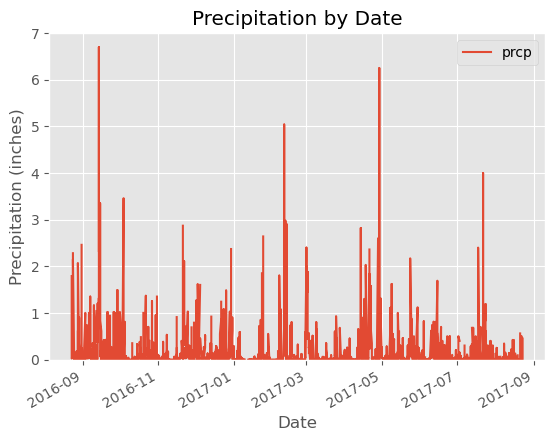

In [12]:
# A query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database and calculating 365 days from that
max_date = session.query(func.max(measurement.date)).scalar()
query_date = dt.date.fromisoformat(max_date) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
    filter(func.strftime('%Y-%m-%d', measurement.date) >= query_date.strftime('%Y-%m-%d')).all()

# Convert the results to a pandas DataFrame
df = pd.DataFrame(results, columns=['date', 'prcp'])

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
df.sort_values('date', inplace=True)

# Set the index of the DataFrame to the date column
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(kind='line', title='Precipitation by Date', xlabel='Date', ylabel='Precipitation (inches)', legend='left')

ax.set_ylim(0,7)

plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_stats = df['prcp'].describe()

# Print the summary statistics
print(prcp_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
station_count =  session.query(func.count(station.id)).all()

print(f'There are {station_count[0][0]} stations in the station table.')

There are 9 stations in the station table.


In [15]:
# A query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.id)).\
                            group_by(measurement.station).\
                            order_by(func.count(measurement.id).desc()).all()

# Print the results
for station, count in most_active_stations:
    print(f"Station {station} had {count} measurements.")

Station USC00519281 had 2772 measurements.
Station USC00519397 had 2724 measurements.
Station USC00513117 had 2709 measurements.
Station USC00519523 had 2669 measurements.
Station USC00516128 had 2612 measurements.
Station USC00514830 had 2202 measurements.
Station USC00511918 had 1979 measurements.
Station USC00517948 had 1372 measurements.
Station USC00518838 had 511 measurements.


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]

temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == most_active_station).all()

# Print the results
print(f"The lowest temperature at station {most_active_station} was {temps[0][0]} degrees Fahrenheit.")
print(f"The highest temperature at station {most_active_station} was {temps[0][1]} degrees Fahrenheit.")
print(f"The average temperature at station {most_active_station} was {temps[0][2]} degrees Fahrenheit.")

The lowest temperature at station USC00519281 was 54.0 degrees Fahrenheit.
The highest temperature at station USC00519281 was 85.0 degrees Fahrenheit.
The average temperature at station USC00519281 was 71.66378066378067 degrees Fahrenheit.


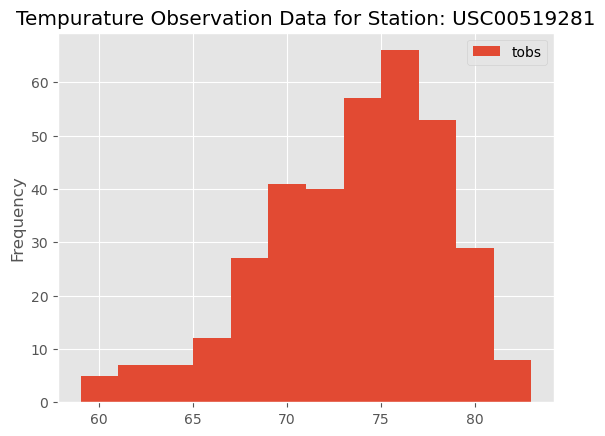

In [20]:
# Using the most active station id, a query the last 12 months of temperature 
# observation data for this station and plot the results as a histogram
max_date = session.query(func.max(measurement.date)).scalar()
query_date = dt.date.fromisoformat(max_date) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.tobs).\
    filter(func.strftime('%Y-%m-%d', measurement.date) >= query_date.strftime('%Y-%m-%d')).\
    filter(measurement.station == most_active_station).\
    all()

# Convert the results to a pandas DataFrame
df = pd.DataFrame(results, columns=['date', 'tobs'])

# Convert the date column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
df.sort_values('date', inplace=True)

# Set the index of the DataFrame to the date column
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(kind='hist', title= f'Tempurature Observation Data for Station: {most_active_station}', xlabel='Date', ylabel='Precipitation (inches)', bins=12)

plt.show()



# Close session

In [18]:
# Close Session
session.close()